The United States Agency for International Development (USAID) is an independent agency of the United States federal government that is primarily responsible for administering civilian foreign aid and development assistance.Data used in the application for final project (DATA 608/Visual analytics) is from https://explorer.usaid.gov/data.html .
Application allow users to explore what are best choices to donate money given the summary of data from (1957 - 2018) of how the distribution of aid is done as per conditions(political and social) in that perticular country.


In [ ]:
# Data cleaning and processing

In [4]:
import plotly.plotly as py
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import warnings; warnings.simplefilter('ignore')

In [2]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [5]:
df2 = pd.read_csv("us_foreign_aid_country.csv")

In [6]:
df2.dtypes

country_code             object
country_name             object
region_id                 int64
region_name              object
income_group_acronym     object
income_group_name        object
transaction_type_id       int64
transaction_type_name    object
fiscal_year              object
current_amount            int64
constant_amount           int64
dtype: object

In [7]:
df2.region_name.unique()

array(['Western Hemisphere', 'South and Central Asia',
       'Sub-Saharan Africa', 'Europe and Eurasia', 'World',
       'Middle East and North Africa', 'East Asia and Oceania'], dtype=object)

In [8]:
df2 = df2[df2.fiscal_year != '1976tq']

In [9]:
df2['fiscal_year'] = pd.to_numeric(df2['fiscal_year'])
df2 = df2[df2.fiscal_year > 1980]

In [10]:
import numpy as np
df3=pd.pivot_table(df2, index=['country_code','country_name'],values=['current_amount'],aggfunc=np.sum)

In [11]:
df4 = df3.reset_index()


In [13]:
data = [ dict(
        type = 'choropleth',
        locations = df4['country_code'],
        z = df4['current_amount'],
        text = df4['country_name'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = '$aid'),
      ) ]

layout = dict(
    title = 'USAID distribution',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

from 1957 till now Iraq and Afganistan has received maximum Aid through USA

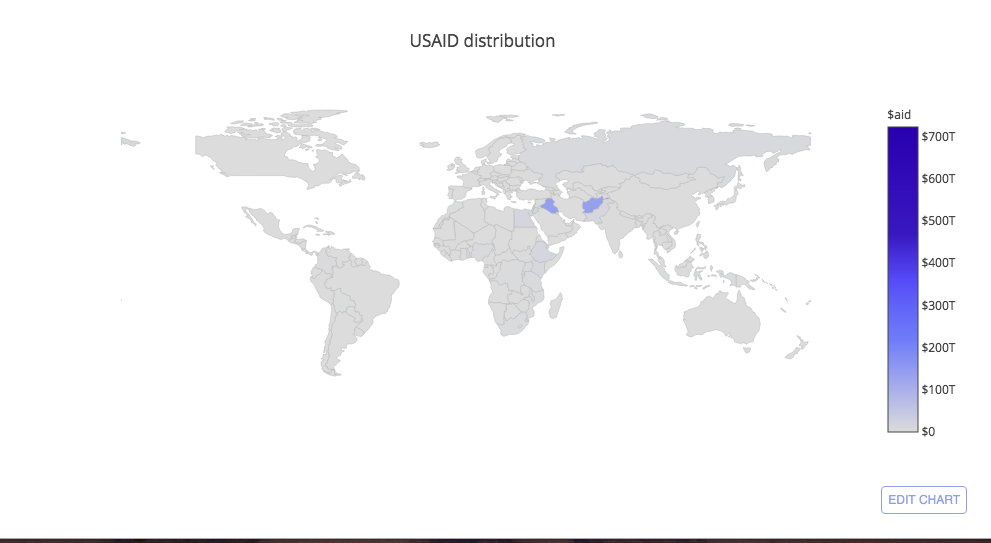

In [5]:
from IPython.display import Image
Image(filename='abc.png')